__Kaggle__

https://www.kaggle.com/mlg-ulb/creditcardfraud

__Detecting Financial Fraud Using Machine Learning: Winning the War Against Imbalanced Data__

https://towardsdatascience.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9

__Goal:__ Identify fraudulent credit card transactions

## Import Libraries

In [3]:
# Manage Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score

## Import Data

In [4]:
%%time

# Load data
dataset = pd.read_csv('creditcard.csv')

# Print Shape
print('Dataset shape', dataset.shape)

Dataset shape (284807, 31)
Wall time: 2.03 s


In [5]:
# The dataset was provided without the original values
# high sensitive data
# PCA transformation

dataset.sample(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138549,82716.0,1.210965,-0.043560,0.635756,0.899367,-0.698891,-0.585779,-0.173448,-0.073145,0.687120,...,-0.109261,-0.099589,-0.069652,0.446295,0.537056,0.411208,-0.016987,0.012553,12.36,0
257210,158054.0,1.876145,0.585367,-0.693007,3.586821,0.687825,0.360974,0.194776,0.051335,-1.310092,...,-0.216898,-0.691472,0.373913,0.691144,-0.263427,-0.400589,-0.044381,-0.043619,12.51,0
113344,73032.0,-4.236187,3.722939,0.638283,1.589339,-1.537458,3.610601,-5.947236,-14.474883,0.330020,...,2.818683,-1.424155,1.735005,0.219740,-0.453031,-0.449495,0.467415,0.328080,6.99,0
83137,59706.0,-1.575954,3.197518,-3.213019,1.508787,-0.171907,-1.808614,-0.109757,0.900808,0.570993,...,-0.165772,-0.157654,0.360956,-0.007267,-0.429845,-0.482592,-0.723685,-0.654278,2.69,0
225444,144251.0,-1.929745,2.608816,-1.773227,-1.651902,0.898382,-1.274378,1.432486,-0.116311,0.593148,...,0.099593,0.935168,-0.204572,-0.372546,0.068906,0.084581,0.703807,0.392260,0.77,0
97840,66406.0,1.283481,1.353023,-1.776374,1.521758,1.158814,-1.525205,0.826378,-0.405620,-0.547826,...,-0.232948,-0.523909,-0.280757,-0.415167,0.954291,-0.266292,0.045147,0.093826,1.00,0
282485,170931.0,-0.357277,0.798765,0.062130,-0.556759,0.610227,-0.959248,1.252846,-0.196372,0.128410,...,-0.105005,-0.218222,-0.002244,-0.204607,-0.334022,-0.149901,0.144341,0.209000,69.32,0
24543,33277.0,1.144047,0.150580,0.387155,1.404608,-0.186385,-0.183946,0.060286,0.000509,0.338616,...,-0.099107,-0.088483,-0.067421,0.086554,0.648382,-0.312857,0.035759,0.017193,19.00,0
267686,162877.0,1.710202,-1.419861,-0.585878,-0.128282,-1.136877,-0.137307,-0.671928,-0.007823,-0.342712,...,-0.464785,-1.229409,0.288459,-0.395468,-0.749223,-0.081706,-0.030800,-0.013842,200.92,0
219213,141640.0,2.179248,0.045570,-2.357286,0.089534,0.878383,-1.015123,0.720686,-0.522618,0.193550,...,0.036141,0.318755,-0.166759,-0.901974,0.500620,0.887653,-0.122430,-0.094856,11.50,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataset.isnull().values#.any()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
dataset[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


<AxesSubplot:>

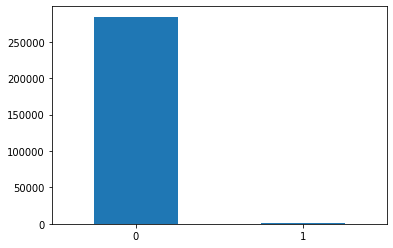

In [9]:
# check target value balance
# where we have 492 frauds out of 284,807 transactions
# The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

dataClasses = pd.value_counts(dataset['Class'])

dataClasses.plot(kind='bar', rot=0)

With this plot it is easy to confirm what we already suspected, the dataset is higly imbalanced.

In [35]:
fraud = dataset[dataset['Class'] == 1]
valid = dataset[dataset['Class'] == 0]

fraudPer = (len(fraud)/len(valid))*100

print('Fraud Transactions: ', len(fraud))
print('Valid Transactions: ', len(valid))
print('Fraud Percentage: {}%' .format(round(fraudPer, 3)))

Fraud Transactions:  492
Valid Transactions:  284315
Fraud Percentage: 0.173%


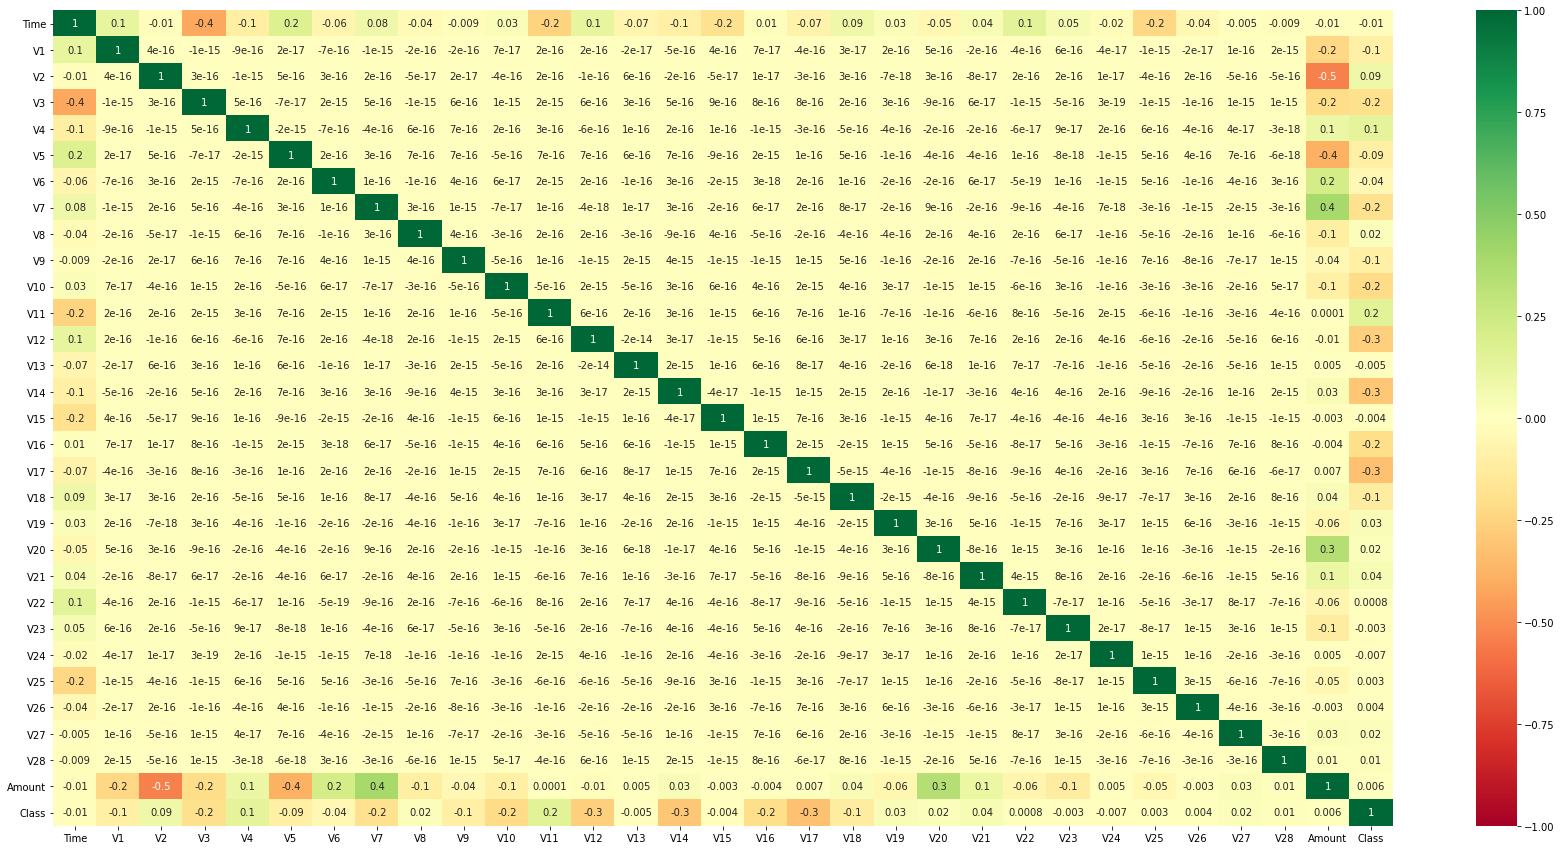

In [18]:
corr = dataset.corr(method='pearson')

figure = plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap="RdYlGn")
plt.show()

In [20]:
#sns.pairplot(dataset, hue='Class')

# Handle Imbalance Data

To deal with imbalance data we can have 3 approachs:
- Oversampling — SMOTE
- Undersampling — RandomUnderSampler
- Combined Class Methods — SMOTE + ENN

## Prepare Data to Feed the Model

X = dataset.drop(['Class'], axis=1) # Exclude the Class column
X = np.array(X) # Transform the dataset into an array

y = dataset[['Class']] # Select only the Class column
y = np.array(y) # Transform the dataset into an array

Stratified Shuffle Split ensures that our target value is 

SSS = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

Split data into train and test with Stratified Shuffle Split

for train_index, test_index in SSS.split(y):
    Xtrain, Xtest = X[train_index], X[test_index]
    Ytrain, Ytest = y[train_index], y[test_index]

In [94]:
X = dataset.iloc[:,:-1] # All the dataset until the last column
y = dataset.iloc[:,-1] # Only the last column

In [95]:
# Shuffle to make sure that each class is represented with approximately equal proportions in both subsets

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Random Forest Classifier

In [123]:
# Declare the Random Forest Classifier

RFclassifier = RandomForestClassifier()

In [113]:
# Passing our training set to the .fit() method
RFclassifier.fit(Xtrain, ytrain)

RandomForestClassifier()

In [114]:
# Compute class predictions

RFpred = RFclassifier.predict(Xtest)

## Model Evaluation

In [115]:
# Calculating FPR, TPR and Tresholds

rf_fpr, rf_tpr, thresholds = roc_curve(ytest, RFpred)

In [116]:
# Calculating AUC Score

rf_auroc = roc_auc_score(ytest, RFpred)
print('Random Forest AUROC: {}' .format(rf_auroc))

Random Forest AUROC: 0.9081280936685311


In [117]:
# Baseline, 0, the worst case scenario

random = [0 for _ in range(len(ytest))]

random_auc = roc_auc_score(ytest, random)
random_fpr, random_tpr, thresholds = roc_curve(ytest, random)

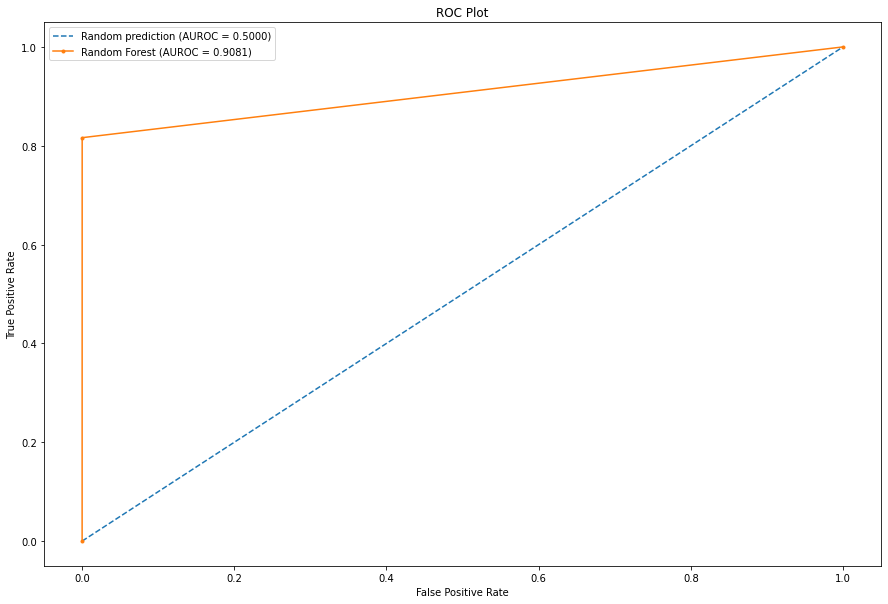

In [118]:
# Ploting the ROC Curve

figure = plt.figure(figsize=(15,10))
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random prediction (AUROC = %0.4f)' % random_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.4f)' % rf_auroc)

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

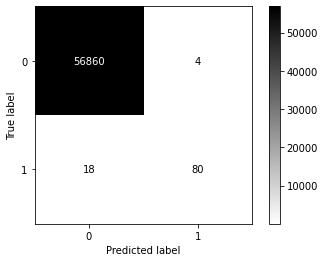

In [121]:
# Plot Confusion Matrix

plot_confusion_matrix(RFclassifier, Xtest, ytest, cmap='binary')

In [122]:
precision = precision_score(ytest, RFpred)
recall = recall_score(ytest, RFpred)

print('Precision: {}' .format(precision)) # The ratio of positive (frauds) predictions that were precise 
print('Recall: {}' .format(recall)) # The ratio of positive instances (frauds) correctly classified by the model

Precision: 0.9523809523809523
Recall: 0.8163265306122449


## Results

- 95% of the positive predictions were correctly classified.
- 82% of the fraudlent transactions were correctly classified.

There is a trade-off between Precision and Recall:
- To get better Precision, we should rise the treshold. However, more fraudlent transactions wouldn't be detected.
- On the other hand, if we lower the treshold we would have more clients being wrongly notified.